# RNS Vectorization timing

This notebook parses `Result.csv`, output of `./timing`.

You may need to install the json module and matplotlib:
```shell
pip install json
pip install matplotlib
```

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
Note: you may need to restart the kernel to use updated packages.


In [24]:
import json
import matplotlib.pyplot as plt
f = open("Results.json", "r")
data = json.loads(f.read())

In [19]:
def pick(data: dict, operation: str, mode: str, measure: str):
    res = []
    for m in data[operation][mode]:
        res.append(m[measure])
    return min(res)

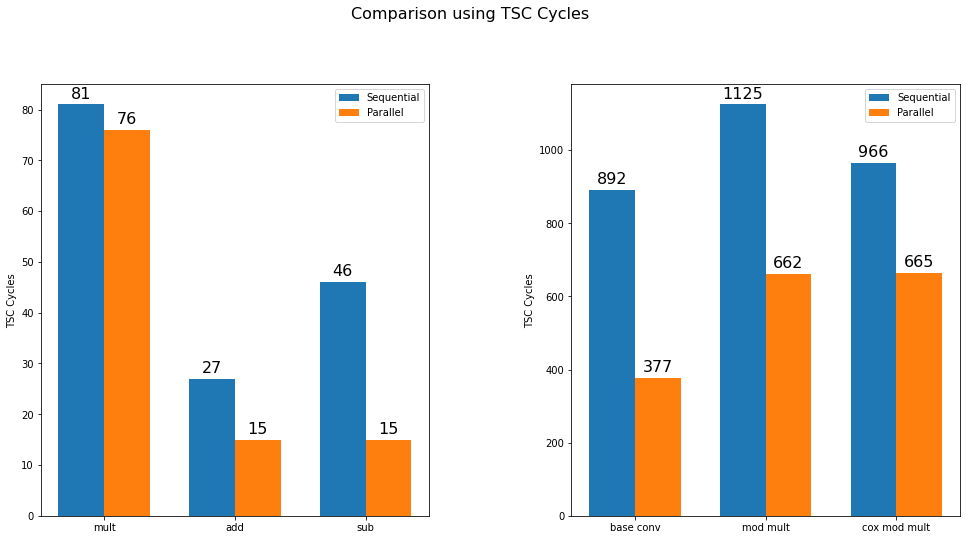

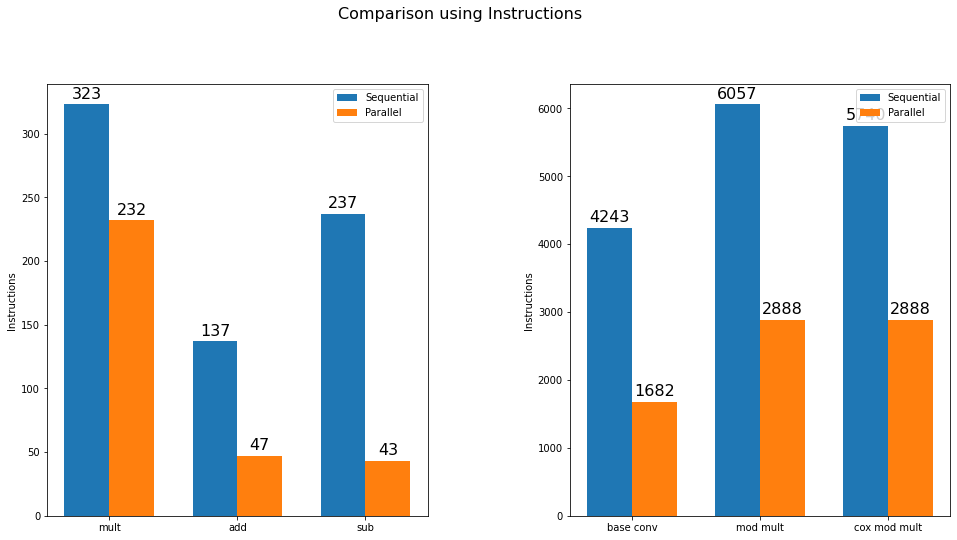

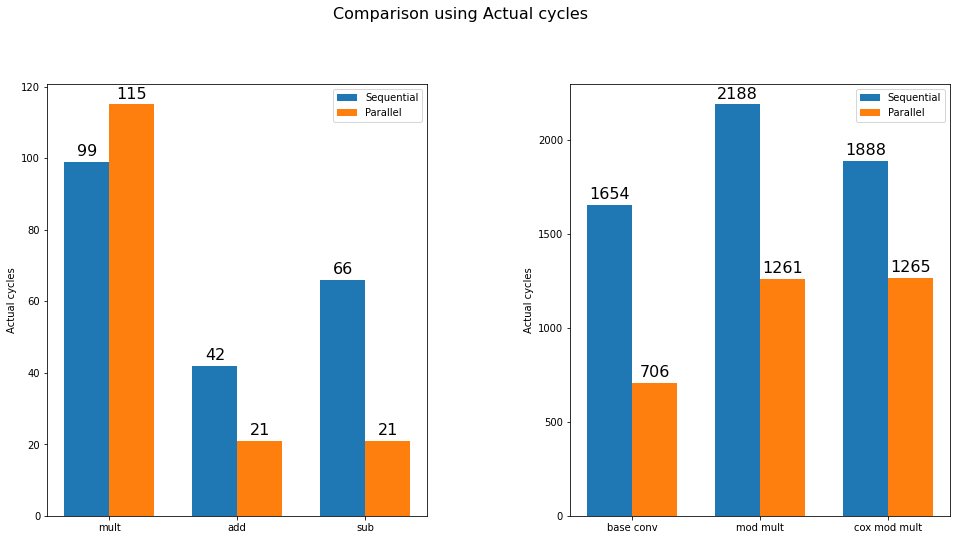

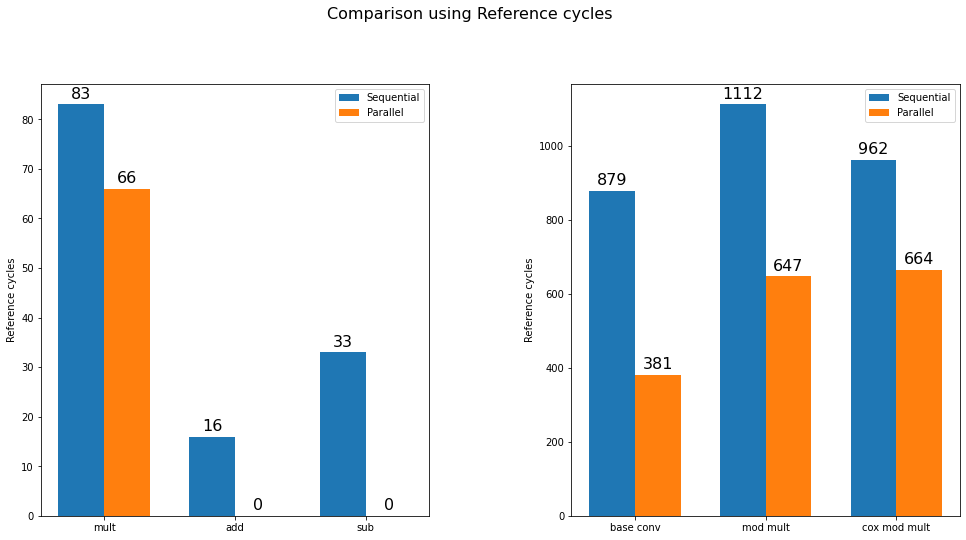

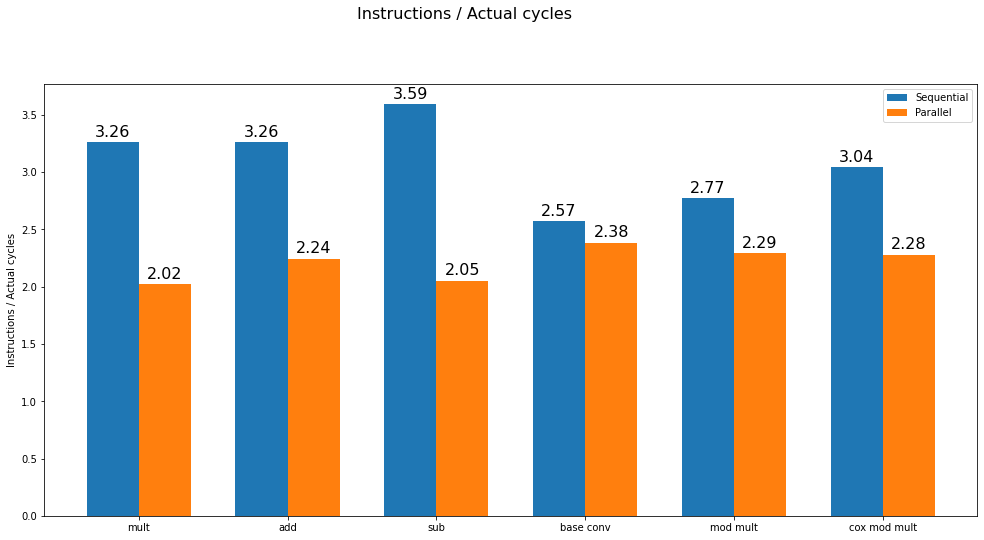

In [20]:
import matplotlib.pyplot as plt
import numpy as np

keys = ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication", "cox_mod_mul"]

for measure in ["TSC Cycles", "Instructions", "Actual cycles", "Reference cycles"]:

    labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]
    sequential = [pick(data, op, "sequential", measure) for op in keys]
    parallel = [pick(data, op, "parallel", measure) for op in keys]

    x = np.arange(3)  # the label locations
    x1 = np.arange(len(keys)//2)
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    rects1 = ax1.bar(x - width/2, sequential[:3], width, label='Sequential')
    rects2 = ax1.bar(x + width/2, parallel[:3], width, label='Parallel')

    rects3 = ax2.bar(x1 - width/2, sequential[3:], width, label='Sequential')
    rects4 = ax2.bar(x1 + width/2, parallel[3:], width, label='Parallel')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fig.suptitle('Comparison using ' + measure, fontsize=16)

    ax1.set_ylabel(measure)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels[:3])
    ax1.legend()

    ax2.set_ylabel(measure)
    ax2.set_xticks(x1)
    ax2.set_xticklabels(labels[3:])
    ax2.legend()

    ax1.bar_label(rects1, padding=3, fontsize=16)
    ax1.bar_label(rects2, padding=3, fontsize=16)

    ax2.bar_label(rects3, padding=3, fontsize=16)
    ax2.bar_label(rects4, padding=3, fontsize=16)

    fig.tight_layout()
    fig.set_size_inches(15,8)
    

# Instructions per cycles
    
labels = ['mult', 'add', 'sub', "base conv", "mod mult", "cox mod mult"]

seq_instructions = [pick(data, op, "sequential", "Instructions") for op in keys]
seq_tsc_cycles = [pick(data, op, "sequential", "Actual cycles") for op in keys]

par_instructions = [pick(data, op, "parallel", "Instructions") for op in keys]
par_tsc_cycles = [pick(data, op, "parallel", "Actual cycles") for op in keys]

sequential_ipc = [round(i / j,2) for i, j in zip(seq_instructions, seq_tsc_cycles)]
parallel_ipc = [round(i / j, 2) for i, j in zip(par_instructions, par_tsc_cycles)]
x = np.arange(len(labels))  # the label locations

fig, ax1 = plt.subplots()

rects1 = ax1.bar(x - width/2, sequential_ipc, width, label='Sequential')
rects2 = ax1.bar(x + width/2, parallel_ipc, width, label='Parallel')

fig.suptitle("Instructions / Actual cycles", fontsize=16)

ax1.set_ylabel("Instructions / Actual cycles")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()


ax1.bar_label(rects1, padding=3, fontsize=16)
ax1.bar_label(rects2, padding=3, fontsize=16)

fig.tight_layout()
fig.set_size_inches(15,8)


plt.show()


In [27]:
res = []
operations = list(data.keys())
modes = list(data[operations[0]].keys())
measures = list(data[operations[0]][modes[0]][0].keys())
print("| Operation | TSC Cycles | Instructions | Actual Cycles | Reference Cycles | Instructions / Cycles |")
print("|:-:|:-:|:-:|:-:|:-:|:-:|")

for operation in operations:
    for mode in modes:
        line = "|"
        line += operation + ' ' + mode + '|'
        for measure in measures:
            value = min([m[measure] for m in data[operation][mode]])
            line += "% s" % value
            line += '|'
            #print(operation + " " + mode + " " + measure + " " + str(min([m[measure] for m in data[operation][mode]])))
        #print(operation + " " + mode + " Instructions/Cycles " + str(round(pick(data, operation, mode, "Instructions")/pick(data, operation, mode, "Actual cycles"), 2)))
        value = round(pick(data, operation, mode, "Instructions")/pick(data, operation, mode, "Actual cycles"), 2)
        line += "% s" % value
        line += '|'
        print(line)

| Operation | TSC Cycles | Instructions | Actual Cycles | Reference Cycles | Instructions / Cycles |
|:-:|:-:|:-:|:-:|:-:|:-:|
|multiplication sequential|100|323|100|99|3.23|
|multiplication parallel|109|232|116|99|2.0|
|addition sequential|42|137|44|33|3.11|
|addition parallel|20|47|21|16|2.24|
|substraction sequential|57|237|66|49|3.59|
|substraction parallel|17|43|21|16|2.05|
|base_conversion sequential|1415|4243|1698|1411|2.5|
|base_conversion parallel|596|1682|721|597|2.33|
|modular_multiplication sequential|1844|6057|2226|1842|2.72|
|modular_multiplication parallel|1063|2888|1321|1062|2.19|
|cox_mod_mul sequential|1460|5740|1963|1460|2.92|
|cox_mod_mul parallel|989|2888|1293|996|2.23|
|cox_base_conv sequential|1081|3927|1416|1095|2.77|
|cox_base_conv parallel|1186|3132|1641|1178|1.91|


| Operation | TSC Cycles | Instructions | Actual Cycles | Reference Cycles | Instructions / Cycles |
|:-:|:-:|:-:|:-:|:-:|:-:|
|multiplication sequential|100|323|100|99|3.23|
|multiplication parallel|109|232|116|99|2.0|
|addition sequential|42|137|44|33|3.11|
|addition parallel|20|47|21|16|2.24|
|substraction sequential|57|237|66|49|3.59|
|substraction parallel|17|43|21|16|2.05|
|base_conversion sequential|1415|4243|1698|1411|2.5|
|base_conversion parallel|596|1682|721|597|2.33|
|modular_multiplication sequential|1844|6057|2226|1842|2.72|
|modular_multiplication parallel|1063|2888|1321|1062|2.19|
|cox_mod_mul sequential|1460|5740|1963|1460|2.92|
|cox_mod_mul parallel|989|2888|1293|996|2.23|
|cox_base_conv sequential|1081|3927|1416|1095|2.77|
|cox_base_conv parallel|1186|3132|1641|1178|1.91|